In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import warnings
import os
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [134]:
df = pd.read_csv("../preprocessed_data/preprocessed_train.csv")

# PCA

In [135]:
def plot_variance_content(df):
    pca = PCA()
    pca.fit(df)
    variance_ratio = pca.explained_variance_ratio_
    x = np.arange(len(variance_ratio))

    plt.bar(x, variance_ratio)
    plt.xlabel('Kolumny')
    plt.ylabel('Zawarta wariancja')
    plt.xticks(x)
    plt.show()

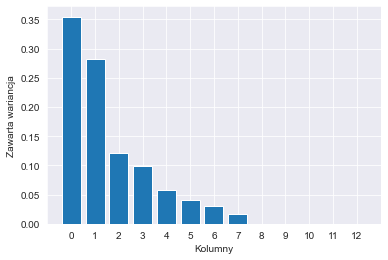

In [136]:
plot_variance_content(df)

In [137]:
def plot_explained_variance(data, variance_ratio_threshold=0.95, max_columns=15):

    pca = PCA()
    pca.fit(data)

    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratio)
    x = np.arange(1, len(variance_ratio) + 1)

    if max_columns:
        cumulative_variance = cumulative_variance[:max_columns]
        x = x[:max_columns]

    plt.plot(x, cumulative_variance, marker='o', linestyle='-', color='b')
    plt.xlabel('Liczba kolumn')
    plt.ylabel('Skumulowana wariancja wyjaśniona')
    plt.grid(True)

    if variance_ratio_threshold:
        plt.axhline(y=variance_ratio_threshold, color='r', linestyle='--')
        intersection_idx = np.argmax(cumulative_variance >= variance_ratio_threshold)
        plt.axvline(x=intersection_idx+1, color='black', linestyle='--')

    plt.show()


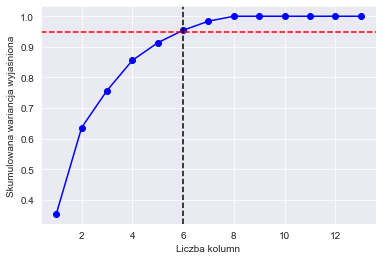

In [138]:
plot_explained_variance(df, 0.95)

In [139]:
pca = PCA(n_components = 7)
df_pca_processed = pd.DataFrame(pca.fit_transform(df))

In [140]:
np.cumsum(pca.explained_variance_ratio_)[-1]

0.9838996599881649

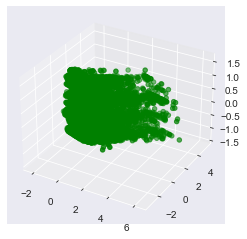

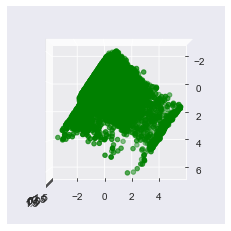

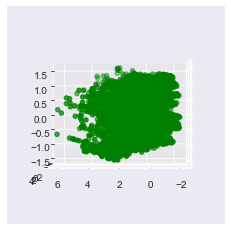

In [141]:
ax1 = plt.axes(projection='3d')
ax1.scatter3D(df_pca_processed.iloc[:,0], df_pca_processed.iloc[:,1], df_pca_processed.iloc[:,2], c='green')
plt.show()

ax1 = plt.axes(projection='3d')
ax1.view_init(90,0)
ax1.scatter3D(df_pca_processed.iloc[:,0], df_pca_processed.iloc[:,1], df_pca_processed.iloc[:,2], c='green')
plt.show()

ax1 = plt.axes(projection='3d')
ax1.view_init(0,90)
ax1.scatter3D(df_pca_processed.iloc[:,0], df_pca_processed.iloc[:,1], df_pca_processed.iloc[:,2], c='green')
plt.show()

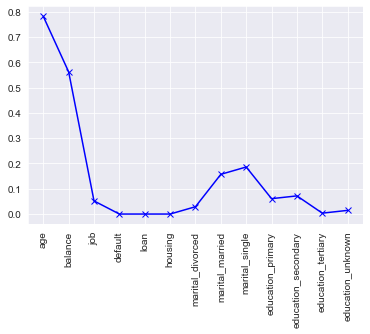

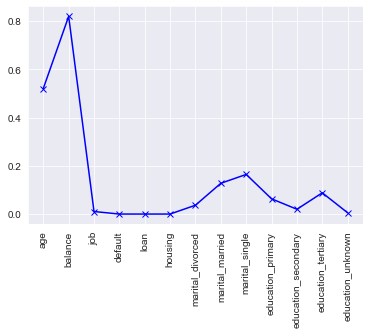

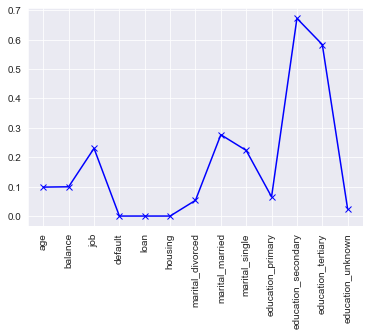

In [142]:
plt.plot(df.columns, abs(pca.components_)[0], 'bx-')
plt.xticks(rotation = 90)
plt.show()

plt.plot(df.columns, abs(pca.components_)[1], 'bx-')
plt.xticks(rotation = 90)
plt.show()

plt.plot(df.columns, abs(pca.components_)[2], 'bx-')
plt.xticks(rotation = 90)
plt.show()

In [143]:
df_pca_processed.to_csv("../preprocessed_data/preprocessed_pca_train.csv",index=False)

pd.DataFrame(pca.transform(pd.read_csv("../preprocessed_data/preprocessed_test.csv"))).to_csv("../preprocessed_data/preprocessed_pca_test.csv",index=False)
pd.DataFrame(pca.transform(pd.read_csv("../preprocessed_data/preprocessed_val.csv"))).to_csv("../preprocessed_data/preprocessed_pca_val.csv",index=False)